# Test estadísticos

#### Test estadísticos I - Introducción

Estos test son técnicas explicativas que utilizan muestras representativas de una población (de nuestros datos) para comprobar la certeza de nuestras afirmaciones (llamadas hipótesis). Esta certeza se expresa en términos de probabilidad.

Aprenderemos que es:
  - La hipótesis nula
  - Error de Tipo I y Tipo II
  - p-valor

In [9]:
#importamos las librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy.stats import skew # importamos esta libreria para conocer la asimetria.
from scipy.stats import kurtosistest #importamos esta libreria para conocer la curtiosis.
from scipy import stats # libreria que se utiliza para contrastar la normalidad.
from scipy.stats import kstest 
plt.rcParams["figure.figsize"] = (12,10)
pd.options.display.max_columns=None

In [10]:
df = pd.read_csv('../datos/diamonds_1.csv', index_col=0)
df.head(3)

,carat,cut,color,clarity,depth,table,price,lenght_mm,width_mm,depth_mm
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,61.8,65.0,327,4.05,4.07,2.31


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53794 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53794 non-null  float64
 1   cut        53794 non-null  object 
 2   color      53794 non-null  object 
 3   clarity    53794 non-null  object 
 4   depth      53794 non-null  float64
 5   table      53794 non-null  float64
 6   price      53794 non-null  int64  
 7   lenght_mm  53794 non-null  float64
 8   width_mm   53794 non-null  float64
 9   depth_mm   53794 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


#### 1. ¿Qué diferencia existe el error de tipo I y el error de tipo II?

Partiendo de la hipótesis nula (en la que se asumen que no existen diferencias entre grupos o relación entre variables):

- *Error tipo I*: Rechazaríamos la H0 (hip. nula) cuando es verdadera.

- *Error tipo II*: La H0 (hp. nula) es falsa, pero no la rechazamos.

#### 2. ¿Qué es la asimetría?

La falta de simetría que presenta una distribución teniendo en cuenta la media, mediana y la moda.  

La asimetría puede generar una curva sesgada hacia la derecha (asimetría negativa) o hacia la izquierda (asimetría positiva).

#### 3. ¿Es vuestra variable respuesta asimétrica?

In [12]:
#Comprobamos con 'skew()' la falta de simetría que presenta una distribución teniendo en cuenta la media.
df['carat'].skew()

0.9717188071571432

Observamos que nuestros datos son simetricos positivos, lo que hace que la distribucion de los mismos datos NO sea normal 

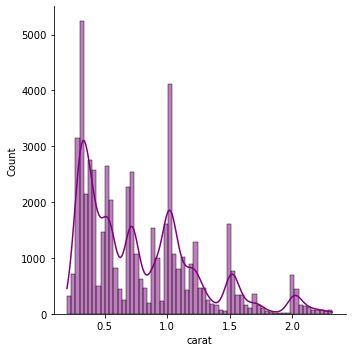

In [13]:
# graficamos los datos obtenidos al sacar la asimetria de nuestra variable respuesta 'carat'.
sns.displot(df['carat'], kde = True, color = "purple");

Observamos que nuestros datos no se parecen en nada a una campana de Gauss, por lo que podemos decir que los datos NO siguen una distribucion normal.

Vemos que la mayoría de diamantes de la muestra tienden a concentrarse en los niveles de carats más bajos, por lo tanto, se da esta asimetría ya que la mayoría de diamantes que observamos en la muestra son de baja calidad (pocos carats).



#### 4. ¿Qué tipo de curtosis presenta vuestra variable respuesta?

In [14]:
#Con este método evaluamos el grado de concentracion que presenta los valores de una variable alrededor de la
#zona central de las frecuencias.
kurtosistest(df['carat'])

KurtosistestResult(statistic=16.867998200250817, pvalue=7.737437113097749e-64)

Nuestra variable respuesta 'carat', presenta un tipo de curtosis denomindado Leptocurtosis, dado que presenta un valor mayor que cero.

El p-valor del test es > 0.05 no podemos rechazar la HO (hipótesis nula), siendo asi datos normales.

#### 5. ¿Es vuestra variable respuesta normal? Demostrarlo visual y analíticamente.

In [15]:
#Test de Shapiro-Wilk
stats.shapiro(df['carat'])

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1760: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.901063084602356, pvalue=0.0)

- Dado que el tamaño de la muestra es mayor que 5000 hemos de elegir el test de Kolmogorov-Smirnov, ya que el test de Shapiro se utiliza para un tamaño de muestra más pequeño

In [16]:
#Test de Kolmogorov-Smirnov
kstest(df["carat"], 'norm')

KstestResult(statistic=0.5904707898640938, pvalue=0.0)

- Comprobamos que los datos NO son normales dado que el p-valor es 0.0, y podemos rechazar la HO (hipotesis nula)